In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:

# 5 repetitions
# MF LSVI, [1000, 10000, 100000], 100, 0.001, 10
# MF LSVI, //, 100, 0.001, inf
# BJ MF , //, 100, 0.001
average_elapsed_time = np.array([[4.360817193984985, 10.094022130966186, 19.250379657745363,
                                  47.49628872871399,
                                  ], [3.4073907375335692, 5.663813066482544, 18.753844356536867,
                                      34.68504190444946],
                                 [5.076862430572509, 7.630458545684815, 19.9551700592041
                                     , 33.90070657730102]])
min_elapsed_time = np.array([[3.334270715713501, 9.858523607254028, 18.46614956855774,
                              34.794851303100586],
                             [2.7024688720703125, 5.531165838241577, 18.602253675460815,
                              34.44559073448181],
                             [4.615549087524414, 7.550577878952026, 19.294901609420776, 33.724193811416626]])
max_elapsed_time = np.array([[6.921351432800293, 10.370682716369629, 21.70014238357544,
                              72.95816946029663],
                             [6.098657608032227, 5.7679078578948975, 19.051411151885986, 34.79058527946472],
                             [5.947683572769165, 7.707855463027954, 22.28180193901062, 34.19564700126648]])
median_elapsed_time = np.array([[3.75643253326416, 10.084840774536133, 18.605260133743286,
                                 34.943785667419434],
                                [2.713860511779785, 5.680481910705566, 18.653026580810547,
                                 34.73198843002319],
                                [4.872496128082275, 7.630124807357788, 19.38558530807495, 33.765504598617554]])
std_elapsed_time = np.array([[1.4663005860537708,
                              0.1972435345054281, 1.3874438887039096,
                              17.86909049399371],
                             [1.5051993523490557,
                              0.09668273792068362, 0.18416622317557815,
                              0.1366881420108835],
                             [0.531612086984474, 0.06044785079686564,
                              1.301657039299659,
                              0.21186501176020842]])

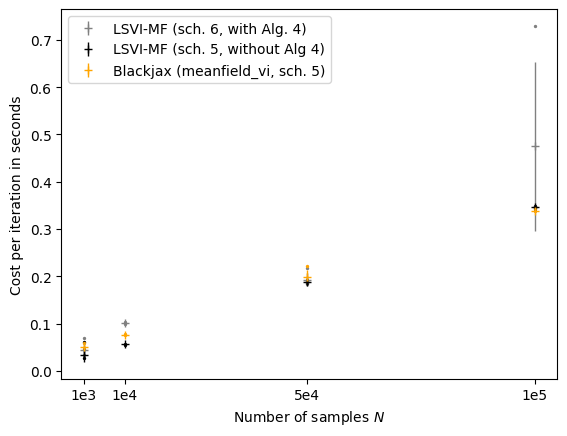

In [3]:
range_x = [1000, 10000, 50000, 100000]
labels = ["LSVI-MF (sch. 6, with Alg. 4)", "LSVI-MF (sch. 5, without Alg 4)", "Blackjax (meanfield_vi, sch. 5)"]
colors = ["gray", "black", "orange"]
for i in range(3):
    plt.errorbar(x=range_x, y=average_elapsed_time[i] / 100, yerr=std_elapsed_time[i] / 100, elinewidth=1,
                 label=labels[i], fmt=' ', marker='+', color=colors[i])
    plt.scatter(x=range_x, y=min_elapsed_time[i]/100, marker='o', color=colors[i], s=2)
    plt.scatter(x=range_x, y=max_elapsed_time[i]/100, marker='o', color=colors[i], s=2)
plt.xlabel(r"Number of samples $N$")
plt.ylabel("Cost per iteration in seconds")
plt.xticks(range_x, ["1e3", "1e4", "5e4", "1e5"])
plt.legend()
plt.savefig("cost_per_iteration_mean_field_mnist.pdf", dpi=300)

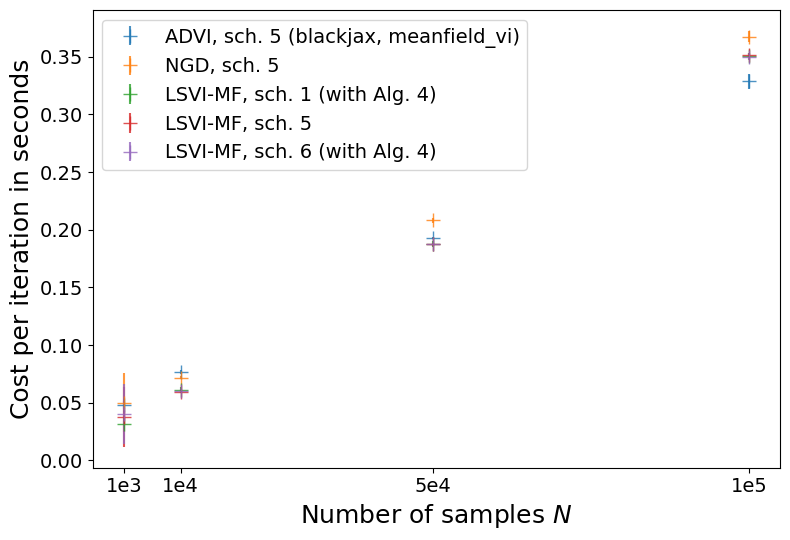

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load cost data
cost_data = pickle.load(open("./walltime_results.pkl", "rb"))
missed_time = pickle.load(open("./walltime_results_3.pkl", "rb"))
missed_time4 = pickle.load(open("./walltime_results_4.pkl", "rb"))
cost_data[3] = missed_time[3]
cost_data = np.concatenate([cost_data, missed_time4[4][np.newaxis]])

# Data for plotting
range_x = [1000, 10000, 50000, 100000]

labels = [
    "LSVI-MF, sch. 5",
    "LSVI-MF, sch. 1 (with Alg. 4)",
    "ADVI, sch. 5 (blackjax, meanfield_vi)",
    "LSVI-MF, sch. 6 (with Alg. 4)",
    "NGD, sch. 5"
]
idxs = [2, 4, 1, 0, 3]

# Create figure with the same dimensions as the previous plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))  # Match previous figure size

# Line styles to keep consistent (but won't be used)
line_styles = ["-", "-", "--", "-.", ":"]

# Plot the data without lines, only error bars
for idx in idxs:
    ax.errorbar(
        x=range_x,
        y=cost_data[idx, :].mean(axis=-1) / 100,
        yerr=2 * cost_data[idx, :].std(axis=-1) / 100,
        label=labels[idx],
        fmt=' ',   # Remove lines, only use markers and error bars
        marker='+',  # Use marker for each data point
        elinewidth=1.5,
        markersize=10,  # Make the markers more visible
        alpha=0.8
    )

# Axes labels and limits
ax.set_xlabel(r"Number of samples $N$", fontsize=18)
ax.set_ylabel("Cost per iteration in seconds", fontsize=18)
ax.set_xticks(range_x)
ax.set_xticklabels(["1e3", "1e4", "5e4", "1e5"])

# Ticks and legend
ax.tick_params(labelsize=14)
ax.legend(loc='upper left', fontsize=14)

# Layout and save the plot
plt.tight_layout()
plt.savefig("cost_per_iteration.pdf", dpi=300)


In [6]:
# Plot losses using walltime
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import jax
lossesPKLs = []
lossesPKL_titles = []
for file in os.listdir("./output_mean_field/losses/"):
    if file.endswith(".pkl"):
        lossesPKLs.append(pickle.load(open("./output_mean_field/losses/" + file, "rb")))
        lossesPKL_titles.append(str(file))


In [30]:
lossesPKL_titles

['ngd_loss.pkl', 'inf_1em.pkl', '10_1.pkl', 'blackjax_loss.pkl', '1_1em3.pkl']

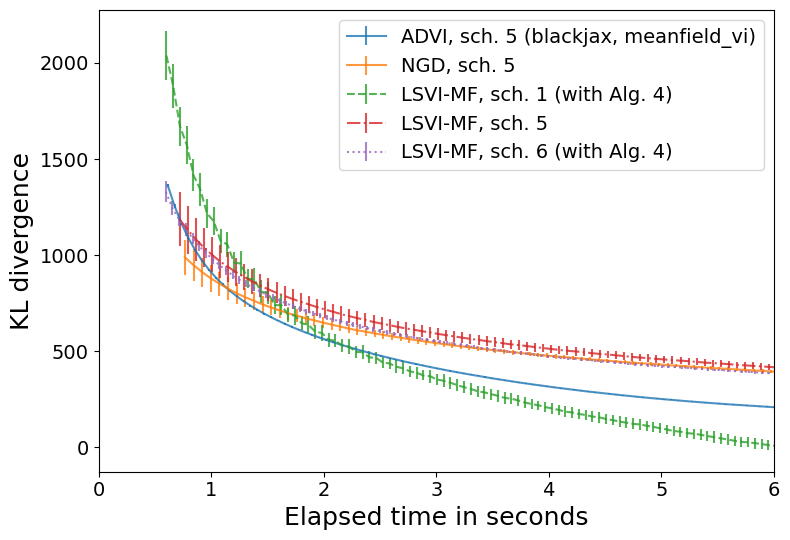

In [7]:
import matplotlib.pyplot as plt
import numpy as np

labels = [
    "NGD, sch. 5",
    "LSVI-MF, sch. 5",
    "LSVI-MF, sch. 1 (with Alg. 4)",
    "ADVI, sch. 5 (blackjax, meanfield_vi)",
    "LSVI-MF, sch. 6 (with Alg. 4)"
]

idxs = [3, 0, 2, 1, 4]
mapping_between_loss_idx_and_time_idx = {4:0, 3:2, 2:3, 1:1, 0:4}
cost = [cost_data[mapping_between_loss_idx_and_time_idx[i], :].mean(axis=-1)/100 for i in idxs]

start = 10
end = 101

fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))  # Match previous figure size

# Optional: consistent color and line style assignments
# colors = ["black", "green", "blue", "purple", "red"]
line_styles = ["-", "-", "--", "-.", ":"]

for i, ls in zip(idxs, line_styles):
    ax.errorbar(
        x=np.arange(start, end) * cost[i][1],
        y=lossesPKLs[i].mean(axis=0)[start:end],
        yerr=lossesPKLs[i].std(axis=0)[start:end],
        label=labels[i],
        elinewidth=1.5,
        linewidth=1.5,
        linestyle=ls,
        alpha=0.8
    )

# Axes labels and limits
ax.set_xlabel("Elapsed time in seconds", fontsize=18)
ax.set_ylabel("KL divergence", fontsize=18)
ax.set_xlim((0, 6))

# Ticks and legend
ax.tick_params(labelsize=14)
ax.legend(loc='upper right', fontsize=14)

# Layout and save
plt.tight_layout()
plt.savefig("losses_mnist_with_respect_to_time.pdf", dpi=300)


In [53]:
lossesPKL_titles

['inf_1em.pkl', '10_1.pkl', 'blackjax_loss.pkl', '1_1em3.pkl']